# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: shanti Kandel https://github.com/Shantik998/Web-Scraping-and-NPL 
Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [49]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                       Version
----------------------------- -----------
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulso

In [50]:
pwd

'/Users/shantikandel/web scraping and NPL/Web-Scraping-and-NPL'

In [51]:
import requests,pickle,io,re,spacy
from bs4 import BeautifulSoup
from contextlib import redirect_stdout
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    article = soup.find("article")

    if article:
        with open("article.pkl", "wb") as file:
            pickle.dump(str(article), file)
            print("Article HTML saved to file")
    else:
        print("Article not found")
else:
    print("Webpage Error")

Article HTML saved to file


1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [52]:
import requests
import pickle

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

def save_html_to_pickle(url, filename):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            html_content = response.text
            with open(filename, 'wb') as file:
                pickle.dump(html_content, file)
            print(f"HTML content has been successfully saved to {filename}.")
        else:
            print(f"Error: Unable to fetch the content. Status code: {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")

filename = "article_html.pkl"
save_html_to_pickle(url, filename)

HTML content has been successfully saved to article_html.pkl.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [53]:
# Read the article HTML from the file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()
# removing empty lines for redability purposes
text_without_empty_lines = "\n".join(line for line in text.split("\n") if line.strip())

print(text_without_empty_lines)

How Laser Headlights Work
                130 Comments            
by:
Lewin Day
March 22, 2021
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [54]:
import spacy

# Download the en_core_web_ig model (you only need to run this once)
spacy.cli.download("en_core_web_sm")

# Load the model
nlp = spacy.load("en_core_web_sm")

# Now you can process text using the loaded model
text = "This is an example sentence."
doc = nlp(text)

# Access different NLP components
for token in doc:
    print(token.text, token.pos_, token.dep_)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 8.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
This PRON nsubj
is AUX ROOT
an DET det
example NOUN compound
sentence NOUN attr
. PUNCT punct


In [55]:
# Load the spaCy model

nlp = spacy.load('en_core_web_sm')

# Process the article text
doc = nlp(text_without_empty_lines)
    
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
token_counter = Counter(tokens)
most_common_tokens = token_counter.most_common(5)
for item in most_common_tokens:
    print(item)

('laser', 35)
('headlights', 19)
('headlight', 11)
('technology', 10)
('led', 10)


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [56]:
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
lemma_counter_obj = Counter(lemmas)
most_common_lemmas = lemma_counter_obj.most_common(5)
for lemma in most_common_lemmas:
    print(lemma)

('laser', 40)
('headlight', 28)
('beam', 12)
('technology', 10)
('light', 10)


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [57]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence
    tokens = word_tokenize(sentence.lower())

    # Count the occurrences of interesting tokens in the sentence
    interesting_token_count = sum(1 for token in tokens if token in interesting_tokens)

    # Calculate the score
    score = interesting_token_count / len(tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Tokenize the sentence
    tokens = word_tokenize(sentence.lower())

    # Initialize WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Count the occurrences of interesting lemmas in the sentence
    interesting_lemma_count = sum(1 for lemma in lemmatized_tokens if lemma in interesting_lemmas)

    # Calculate the score
    score = interesting_lemma_count / len(tokens)
    return score

input_sentence = "The quick brown fox jumps over the lazy dog."

# Modify the interesting tokens and lemmas lists
interesting_tokens = ["laser", "headlight", "led", "beam", "technology"]
interesting_lemmas = ["laser", "headlight", "led", "beam", "technology"]

token_score = score_sentence_by_token(input_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(input_sentence, interesting_lemmas)

print("Token Score:", token_score)
print("Lemma Score:", lemma_score)


Token Score: 0.0
Lemma Score: 0.0


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Text(0.5, 1.0, 'Distribution of Token Scores')

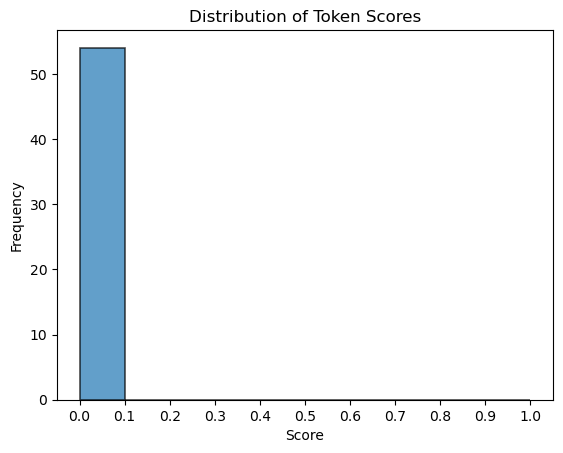

In [58]:
# using indexing and slicing to exclude the initial and last line of text 
# from the article

start_string = "2021"
start_index = text_without_empty_lines.index(start_string) + len(start_string)
text_to_process = text_without_empty_lines[start_index:]
doc = nlp(text_to_process)
sentences = sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
sentences = sentences[:54]
tokens_hist_values = [score_sentence_by_token(sentence, most_common_tokens) for sentence in sentences if score_sentence_by_token(sentence, most_common_tokens) != 'No tokens found']
plt.hist(tokens_hist_values, bins=10, range=(0, 1),edgecolor='black', linewidth=1.2,alpha=0.7)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Token Scores')

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

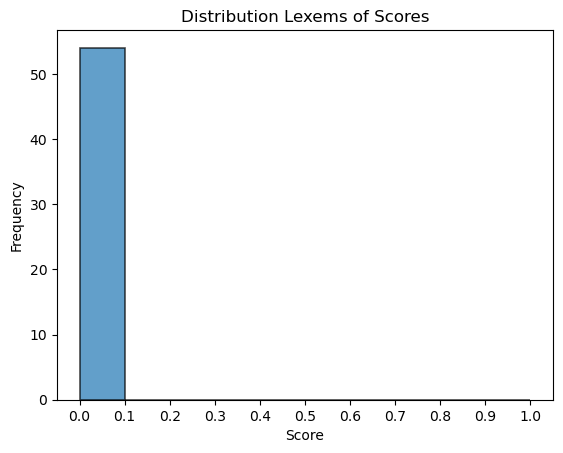

In [59]:
start_string = "2021"
start_index = text_without_empty_lines.index(start_string) + len(start_string)
text_to_process = text_without_empty_lines[start_index:]
doc = nlp(text_to_process)
sentences = sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
sentences = sentences[:54]
lemmas_hist_values = [score_sentence_by_lemma(sentence, most_common_lemmas) for sentence in sentences if score_sentence_by_lemma(sentence, most_common_lemmas) != 'No lemmas found']
plt.hist(lemmas_hist_values, bins=10, range=(0, 1),edgecolor='black', linewidth=1.2,alpha=0.7)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution Lexems of Scores')

plt.show();


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

In [60]:
def is_noun_list(word_list):
    """
    Checks if a list of words consists only of nouns.

    Parameters:
    - word_list (list): A list of words to be checked.

    Prints a message for each word in the list that is not classified as a noun,
    indicating the word, its part-of-speech (POS) tag, and that it would be excluded
    from the original list.

    Returns:
    None
    """
    for word in word_list:
        doc = nlp(word)
        for token in doc:
            if token.pos_ != "NOUN":
                print(str(token) +" is a "+str(token.pos_).lower()\
                      +" and it would be excluded from the original list")

In [61]:
# shows what lexems are not included based on question 8 directions
is_noun_list([x[0] for x in most_common_lemmas])

headlight is a verb and it would be excluded from the original list
light is a adj and it would be excluded from the original list
